In [1]:
# Veri manipülasyonu
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Uyarıları kapat
import warnings
warnings.filterwarnings('ignore')

print("✅ Kütüphaneler başarıyla yüklendi!")

✅ Kütüphaneler başarıyla yüklendi!


In [2]:
# Veriyi yükle
df = pd.read_csv('../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("✅ Veri başarıyla yüklendi!")
print(f"\n📊 Veri Boyutu: {df.shape[0]} satır, {df.shape[1]} kolon")

✅ Veri başarıyla yüklendi!

📊 Veri Boyutu: 7043 satır, 21 kolon


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("📝 Kolonlar:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

📝 Kolonlar:
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn


In [5]:
print("🔍 VERİ BİLGİLERİ:")
print("="*60)
df.info()

🔍 VERİ BİLGİLERİ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 n

In [6]:
print("❓ EKSİK DEĞER KONTROLÜ:")
print("="*60)

eksik_deger = df.isnull().sum()
eksik_deger_var = eksik_deger[eksik_deger > 0]

if len(eksik_deger_var) == 0:
    print("✅ Hiç eksik değer yok!")
else:
    print(eksik_deger_var)
    print(f"\n⚠️ Toplam {df.isnull().sum().sum()} eksik değer var")

❓ EKSİK DEĞER KONTROLÜ:
✅ Hiç eksik değer yok!


In [7]:
print("🎯 CHURN ANALİZİ")
print("="*60)

# Churn dağılımı
print("\n1️⃣ Churn Dağılımı:")
print(df['Churn'].value_counts())

print("\n2️⃣ Churn Yüzdeleri:")
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print(churn_percent)

print(f"\n📌 Churn Oranı: %{churn_percent['Yes']:.2f}")
print(f"📌 Toplam {df[df['Churn']=='Yes'].shape[0]} müşteri kaybedilmiş!")

🎯 CHURN ANALİZİ

1️⃣ Churn Dağılımı:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

2️⃣ Churn Yüzdeleri:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

📌 Churn Oranı: %26.54
📌 Toplam 1869 müşteri kaybedilmiş!


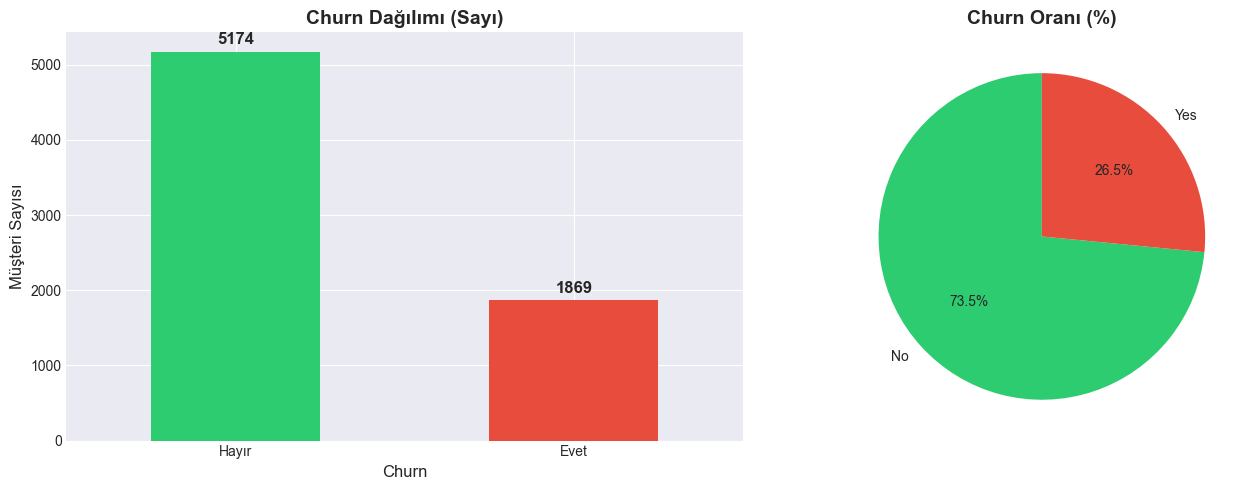


💡 YORUM: Müşterilerin %26.5'si şirketten ayrılmış.
Bu da yaklaşık her 4 müşteriden 1'i demek! 😮


In [8]:
# Grafik boyutu
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol grafik: Sayılar
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Churn Dağılımı (Sayı)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Müşteri Sayısı', fontsize=12)
axes[0].set_xticklabels(['Hayır', 'Evet'], rotation=0)

# Değerleri grafik üzerine yaz
for i, v in enumerate(df['Churn'].value_counts()):
    axes[0].text(i, v + 100, str(v), ha='center', fontweight='bold', fontsize=12)

# Sağ grafik: Yüzdeler (Pasta)
churn_percent.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                   colors=['#2ecc71', '#e74c3c'], startangle=90)
axes[1].set_title('Churn Oranı (%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print(f"\n💡 YORUM: Müşterilerin %{churn_percent['Yes']:.1f}'si şirketten ayrılmış.")
print(f"Bu da yaklaşık her 4 müşteriden 1'i demek! 😮")

In [9]:
# Kategorik ve sayısal kolonları ayır
kategorik = df.select_dtypes(include=['object']).columns.tolist()
sayisal = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("📊 KATEGORİK DEĞİŞKENLER:")
print(kategorik)
print(f"\nToplam: {len(kategorik)} adet")

print("\n🔢 SAYISAL DEĞİŞKENLER:")
print(sayisal)
print(f"\nToplam: {len(sayisal)} adet")

📊 KATEGORİK DEĞİŞKENLER:
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Toplam: 18 adet

🔢 SAYISAL DEĞİŞKENLER:
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Toplam: 3 adet


In [10]:
print("📈 SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ:")
print("="*70)
df[sayisal].describe().T

📈 SAYISAL DEĞİŞKENLERİN İSTATİSTİKLERİ:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


✅ TotalCharges düzeltildi!
Veri tipi: float64


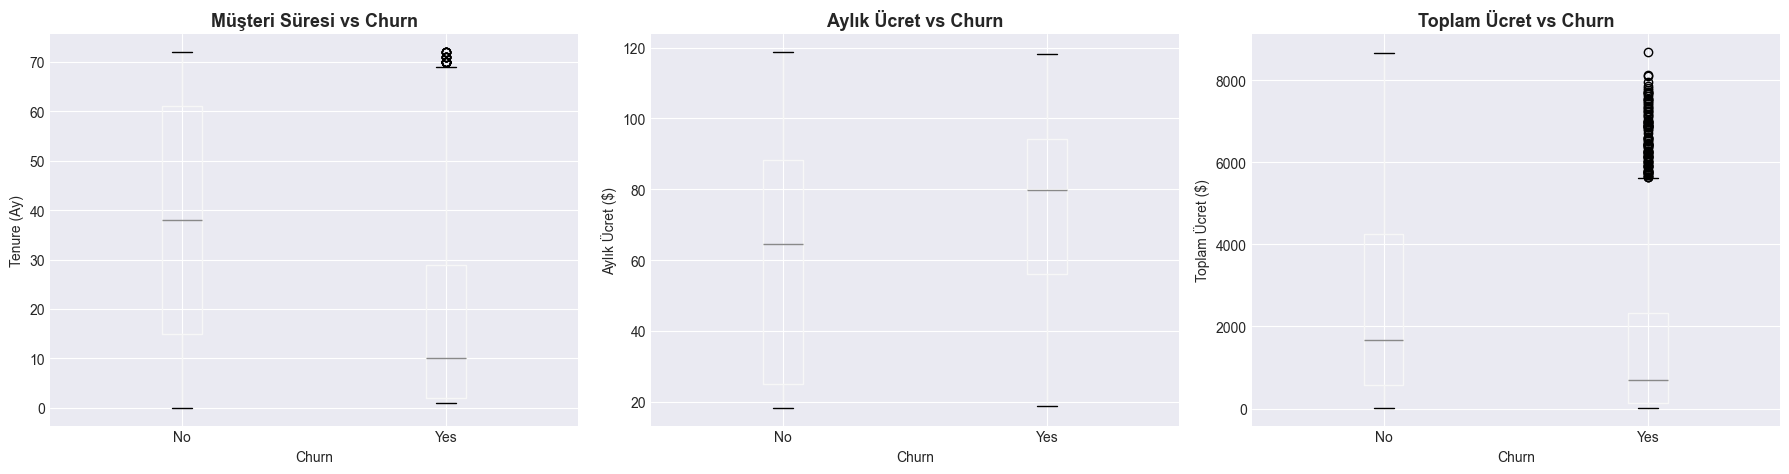


💡 YORUMLAR:
• Ayrılan müşterilerin tenure'ı (müşteri süresi) daha düşük
• Ayrılan müşteriler daha yüksek aylık ücret ödüyor
• Toplam ücret ayrılanlarda daha düşük (çünkü daha az kaldılar)


In [12]:
# TotalCharges'ı sayısal hale getir (bazı değerler string olabilir)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Boş değerleri doldur (eğer varsa)
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

print("✅ TotalCharges düzeltildi!")
print(f"Veri tipi: {df['TotalCharges'].dtype}")

# Şimdi grafikleri çiz
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure (Müşteri Süresi)
df.boxplot(column='tenure', by='Churn', ax=axes[0])
axes[0].set_title('Müşteri Süresi vs Churn', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure (Ay)')

# Monthly Charges
df.boxplot(column='MonthlyCharges', by='Churn', ax=axes[1])
axes[1].set_title('Aylık Ücret vs Churn', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Aylık Ücret ($)')

# Total Charges (Artık çalışacak!)
df.boxplot(column='TotalCharges', by='Churn', ax=axes[2])
axes[2].set_title('Toplam Ücret vs Churn', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Toplam Ücret ($)')

plt.suptitle('')
plt.tight_layout()
plt.show()

print("\n💡 YORUMLAR:")
print("• Ayrılan müşterilerin tenure'ı (müşteri süresi) daha düşük")
print("• Ayrılan müşteriler daha yüksek aylık ücret ödüyor")
print("• Toplam ücret ayrılanlarda daha düşük (çünkü daha az kaldılar)")

📋 CONTRACT (SÖZLEŞME TİPİ) ANALİZİ:

1️⃣ Sözleşme Tipi Dağılımı:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

2️⃣ Sözleşme Tipine Göre Churn Oranları:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


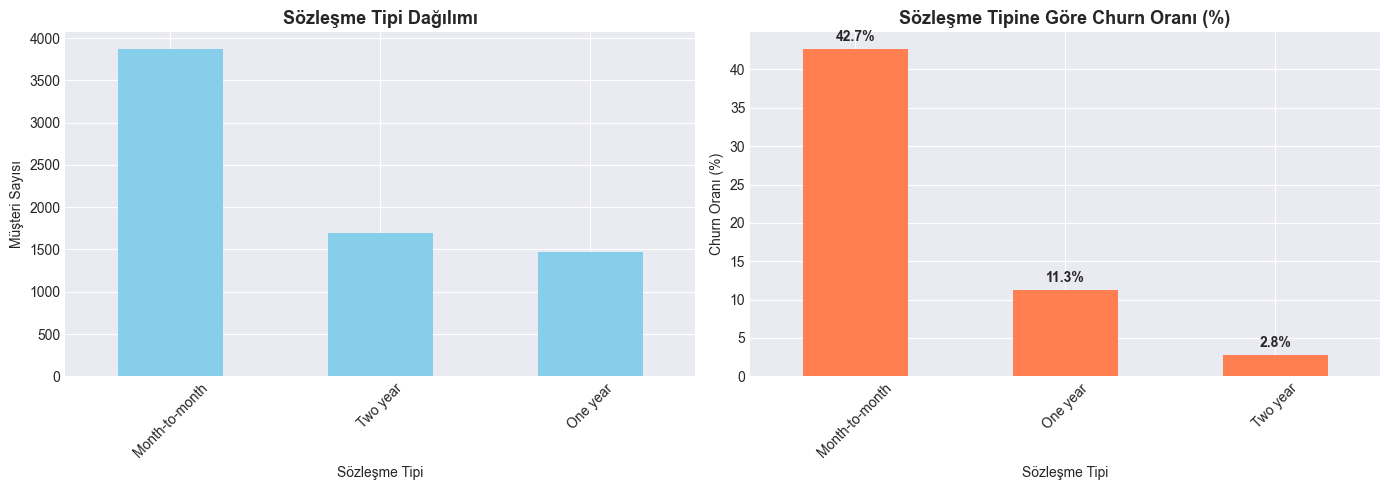


💡 ÖNEMLİ BULGU:
• Aylık sözleşmesi olanların churn oranı: %42.7
• İki yıllık sözleşmesi olanların churn oranı: %2.8
• Uzun vadeli sözleşme = Daha düşük churn! 🎯


In [13]:
print("📋 CONTRACT (SÖZLEŞME TİPİ) ANALİZİ:")
print("="*60)

# Dağılım
print("\n1️⃣ Sözleşme Tipi Dağılımı:")
print(df['Contract'].value_counts())

# Churn oranları
print("\n2️⃣ Sözleşme Tipine Göre Churn Oranları:")
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
print(contract_churn)

# Görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol: Dağılım
df['Contract'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sözleşme Tipi Dağılımı', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Sözleşme Tipi')
axes[0].set_ylabel('Müşteri Sayısı')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# Sağ: Churn oranları
contract_churn['Yes'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Sözleşme Tipine Göre Churn Oranı (%)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Sözleşme Tipi')
axes[1].set_ylabel('Churn Oranı (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Değerleri yaz
for i, v in enumerate(contract_churn['Yes']):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 ÖNEMLİ BULGU:")
print(f"• Aylık sözleşmesi olanların churn oranı: %{contract_churn.loc['Month-to-month', 'Yes']:.1f}")
print(f"• İki yıllık sözleşmesi olanların churn oranı: %{contract_churn.loc['Two year', 'Yes']:.1f}")
print("• Uzun vadeli sözleşme = Daha düşük churn! 🎯")

🌐 INTERNET SERVICE ANALİZİ:
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


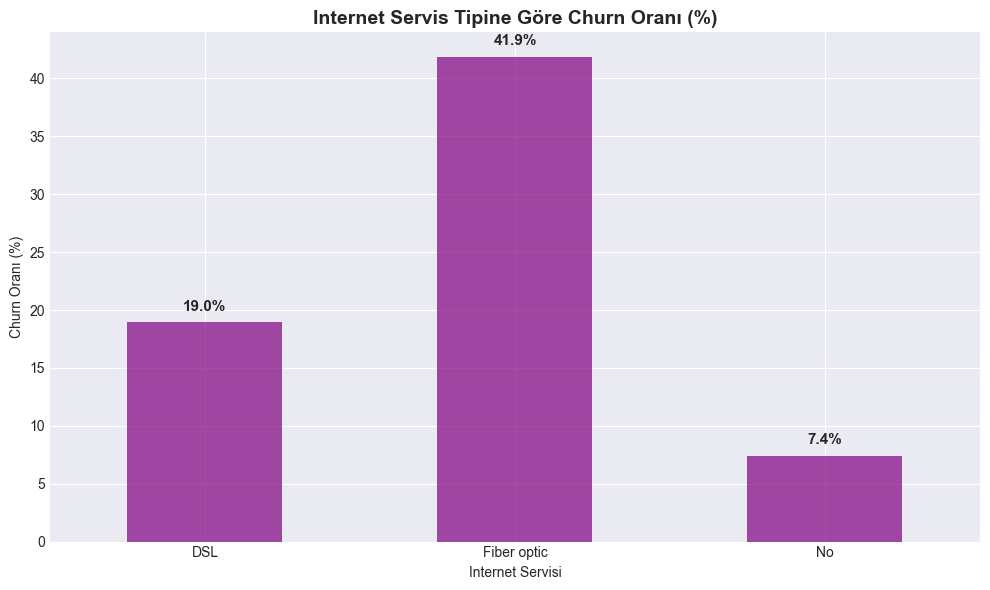


💡 BULGU:
Fiber optic kullanıcılarının churn oranı çok yüksek!
DSL kullanıcıları daha sadık görünüyor.


In [14]:
print("🌐 INTERNET SERVICE ANALİZİ:")
print("="*60)

# Churn oranları
internet_churn = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100
print(internet_churn)

# Görselleştirme
plt.figure(figsize=(10, 6))
internet_churn['Yes'].plot(kind='bar', color='purple', alpha=0.7)
plt.title('Internet Servis Tipine Göre Churn Oranı (%)', fontsize=14, fontweight='bold')
plt.xlabel('Internet Servisi')
plt.ylabel('Churn Oranı (%)')
plt.xticks(rotation=0)

# Değerleri yaz
for i, v in enumerate(internet_churn['Yes']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n💡 BULGU:")
print("Fiber optic kullanıcılarının churn oranı çok yüksek!")
print("DSL kullanıcıları daha sadık görünüyor.")

⏱️ TENURE (MÜŞTERİ SÜRESİ) ANALİZİ:


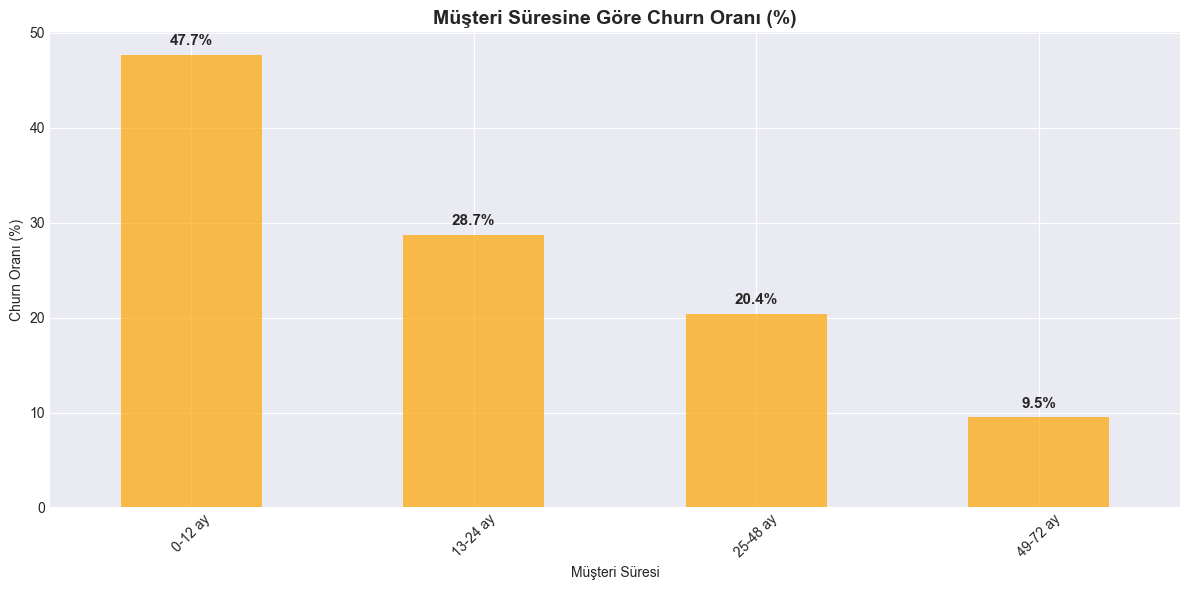


💡 KRİTİK BULGU:
İlk 12 ayda churn çok yüksek!
Müşteri ne kadar uzun süre kalırsa, ayrılma ihtimali o kadar düşük.

🎯 ÖNERİ: İlk yıldaki müşterilere özel ilgi gösterilmeli!


In [15]:
print("⏱️ TENURE (MÜŞTERİ SÜRESİ) ANALİZİ:")
print("="*60)

# Tenure grupları oluştur
df['tenure_group'] = pd.cut(df['tenure'], 
                             bins=[0, 12, 24, 48, 72], 
                             labels=['0-12 ay', '13-24 ay', '25-48 ay', '49-72 ay'])

# Grup bazında churn
tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100

# Görselleştirme
plt.figure(figsize=(12, 6))
tenure_churn['Yes'].plot(kind='bar', color='orange', alpha=0.7)
plt.title('Müşteri Süresine Göre Churn Oranı (%)', fontsize=14, fontweight='bold')
plt.xlabel('Müşteri Süresi')
plt.ylabel('Churn Oranı (%)')
plt.xticks(rotation=45)

# Değerleri yaz
for i, v in enumerate(tenure_churn['Yes']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n💡 KRİTİK BULGU:")
print("İlk 12 ayda churn çok yüksek!")
print("Müşteri ne kadar uzun süre kalırsa, ayrılma ihtimali o kadar düşük.")
print("\n🎯 ÖNERİ: İlk yıldaki müşterilere özel ilgi gösterilmeli!")

💳 PAYMENT METHOD (ÖDEME YÖNTEMİ) ANALİZİ:


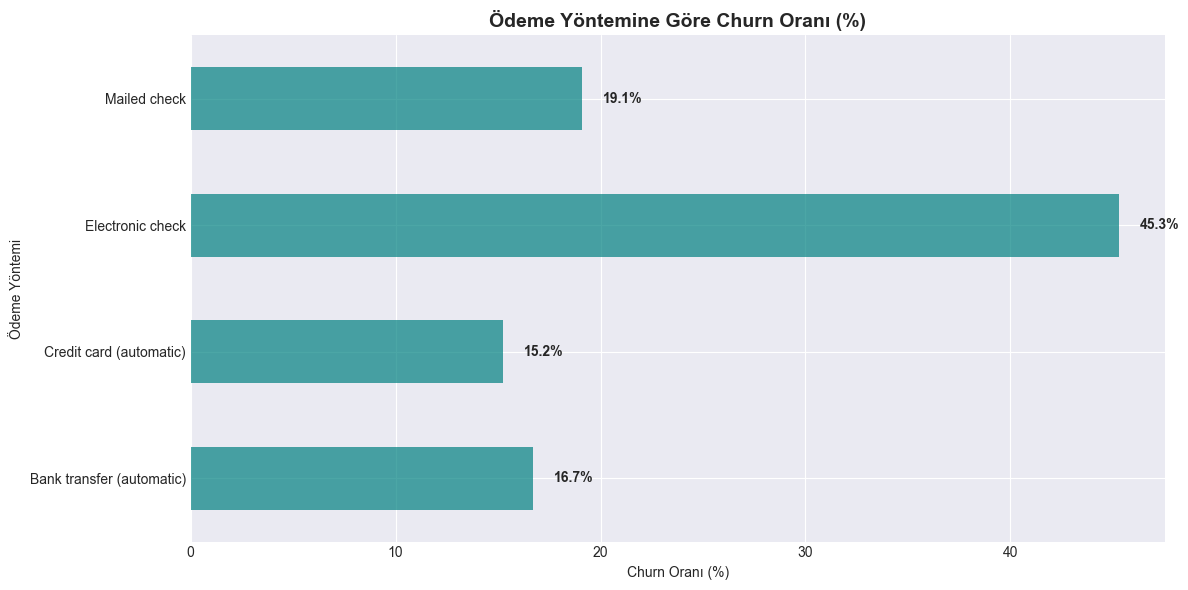


💡 BULGU:
Electronic check kullananlar en yüksek churn oranına sahip!
Otomatik ödeme yapanlar daha sadık.


In [16]:
print("💳 PAYMENT METHOD (ÖDEME YÖNTEMİ) ANALİZİ:")
print("="*60)

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

# Görselleştirme
plt.figure(figsize=(12, 6))
payment_churn['Yes'].plot(kind='barh', color='teal', alpha=0.7)
plt.title('Ödeme Yöntemine Göre Churn Oranı (%)', fontsize=14, fontweight='bold')
plt.xlabel('Churn Oranı (%)')
plt.ylabel('Ödeme Yöntemi')

# Değerleri yaz
for i, v in enumerate(payment_churn['Yes']):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 BULGU:")
print("Electronic check kullananlar en yüksek churn oranına sahip!")
print("Otomatik ödeme yapanlar daha sadık.")

In [17]:
print("✅ TEMEL EDA TAMAMLANDI!")
print("="*60)
print("\n📊 ÖZET BULGULAR:")
print("1. Genel churn oranı: ~%27")
print("2. İlk 12 ay kritik dönem - churn çok yüksek")
print("3. Aylık sözleşmeler riskli")
print("4. Fiber optic kullanıcıları daha fazla ayrılıyor")
print("5. Electronic check ödemesi risk faktörü")
print("\n🎯 Sonraki adım: Veri ön işleme ve modelleme!")

✅ TEMEL EDA TAMAMLANDI!

📊 ÖZET BULGULAR:
1. Genel churn oranı: ~%27
2. İlk 12 ay kritik dönem - churn çok yüksek
3. Aylık sözleşmeler riskli
4. Fiber optic kullanıcıları daha fazla ayrılıyor
5. Electronic check ödemesi risk faktörü

🎯 Sonraki adım: Veri ön işleme ve modelleme!
